# SVM machine learning
$\textit{Chapter by: Tobey Bell}$

In this chapter we will discuss a different method for determining the boundary between collections of points known as Support Vector Machines, or more commonly known as SVMs.

A SVM is a supervised learning model that takes in a collection of data points, and then using what is known as a hyperplane, divides the region of space into multiple different regions which can then be used to predict the output result of a new point.



For further understanding of the code witten in this section plese refer to the following documentation by Sklearn <sup>[[1]](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)</sup>.

Alternatively see this article<sup>[[2]](https://scikit-learn.org/stable/modules/svm.html)</sup>.

For plotting the decision boundaries, please refer to this article<sup>[[3]](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html)</sup>

### 1D case

Firstly, we will observe the most simple case, Where our dataset is a 1d array of points, and the hyperplane is a point. (A line will be drawn, however all y coordinates should be ignored for this example)

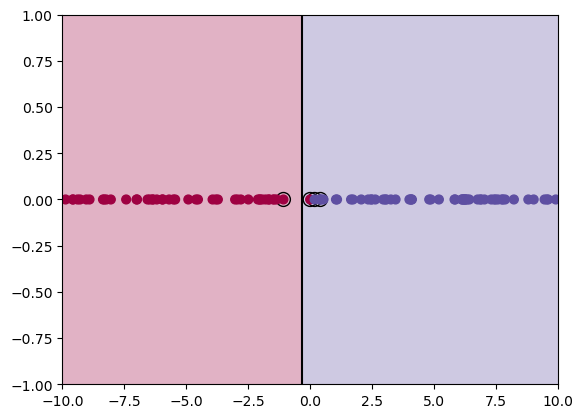

Of the reserved datapoints, 98/100 were correctly predicted, creating an accuracy of 98.0%


In [1]:
# Firstly, we import the required libraries we will make use of in this chapter
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

# We then generate a set of data to train upon
N = 100
X = np.zeros((2*N,2))
y = np.zeros(2*N)
Y = np.zeros(2*N)

for i in range(len(X[:,0])):
    X[i,0] = np.random.random()*20-10
    if X[i,0] > 0: # Here we set the boundary of the data to be the line x > 0, which determines the colour of the points. The learning alogorithm doesn't know this.
        y[i] = 1

_, ax = plt.subplots()
ax.set(xlim=(-10,10), ylim=(-1, 1)) # We form the canvas to plot upon

clf = svm.SVC(kernel="linear")
clf.fit(X[N:,:], y[N:]) # Here we fit the model to the data using the SVM function in sklearn

# The following code produces the diagram
common_params = {"estimator": clf, "X": X[N:,:], "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="pcolormesh",
    cmap=plt.cm.Spectral,
    alpha=0.3,
    grid_resolution = 1000
)
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=0,
    colors="k",
    #linestyles=["--", "-", "--"],
)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
)
ax.scatter(X[N:,0],X[N:,1],c=y[N:],s=40,cmap=plt.cm.Spectral) # Displaying the training dataset
plt.show()

prediction = clf.predict(X[:N,:]) # We here predict the output of the datapoints saved based upon the decision boundary
actual = y[:N]
print(f"Of the reserved datapoints, {np.sum(prediction==actual)}/{len(actual)} were correctly predicted, creating an accuracy of {100*np.sum(prediction==actual)/len(actual)}%")

Here we see that the SVM has accurately found the hyperplane between the collections of points in 1D. We can further this functionality to higher dimensional cases, specifically and most commonly used, the 2D case

### 2D case

Here we use the exact same method however with the points in 2d space, and thus the hyperplane will be a straight line

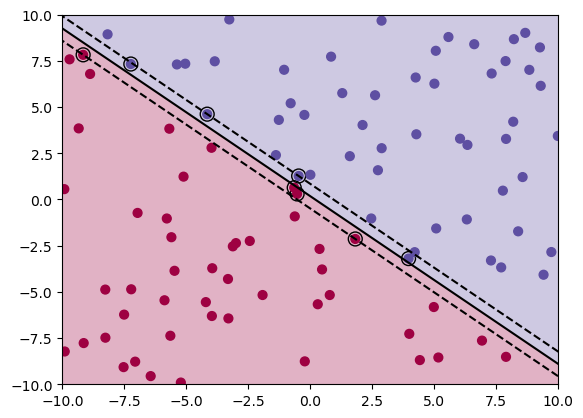

Of the reserved datapoints, 97/100 were correctly predicted, creating an accuracy of 97.0%


In [2]:
# We then generate a set of data to train upon
N = 100
X = np.random.random((2*N,2))*20-10
y = np.zeros(2*N)
Y = np.zeros(2*N)

for i in range(len(X[:,0])):
    if X[i,0]+X[i,1]>0: # Here we set the boundary of the data to be the line y + x > 0, which determines the colour of the points. The learning alogorithm doesn't know this.
        y[i] = 1

_, ax = plt.subplots()
ax.set(xlim=(-10,10), ylim=(-10, 10)) # We form the canvas to plot upon

clf = svm.SVC(kernel="linear")
clf.fit(X[N:,:], y[N:]) # Here we fit the model to the data using the SVM function in sklearn

# The following code produces the diagram
common_params = {"estimator": clf, "X": X[N:,:], "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="pcolormesh",
    cmap=plt.cm.Spectral,
    alpha=0.3,
    grid_resolution = 1000
)
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
)
ax.scatter(X[N:,0],X[N:,1],c=y[N:],s=40,cmap=plt.cm.Spectral) # Displaying the training dataset
plt.show()

prediction = clf.predict(X[:N,:]) # We here predict the output of the datapoints saved based upon the decision boundary
actual = y[:N]
print(f"Of the reserved datapoints, {np.sum(prediction==actual)}/{len(actual)} were correctly predicted, creating an accuracy of {100*np.sum(prediction==actual)/len(actual)}%")

We have Circled the support vectors of the model, this is a subset of the data points that determine most closely the hyperplane

## Non-linear SVM

So far we have only seen SVMs working on easily seperable data, which can be seperated using linear hyperplanes, however not all data is of such a nice format, take the dataset below for example:


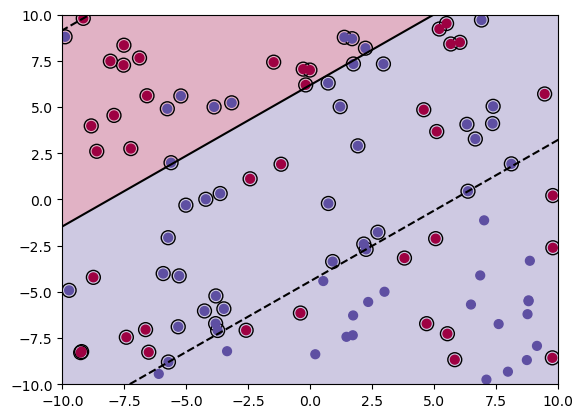

Of the reserved datapoints, 62/100 were correctly predicted, creating an accuracy of 62.0%


In [3]:
# We then generate a set of data to train upon
N = 100
X = np.random.random((2*N,2))*20-10
y = np.zeros(2*N)
Y = np.zeros(2*N)

for i in range(len(X[:,0])):
    if np.sin(X[i,0])>0: # Here we designate the data to be the sign of sin(x), which determines the colour of the points. The learning alogorithm doesn't know this.
        y[i] = 1

_, ax = plt.subplots()
ax.set(xlim=(-10,10), ylim=(-10, 10)) # We form the canvas to plot upon

clf = svm.SVC(kernel="linear")
clf.fit(X[N:,:], y[N:]) # Here we fit the model to the data using the SVM function in sklearn

# The following code produces the diagram
common_params = {"estimator": clf, "X": X[N:,:], "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="pcolormesh",
    cmap=plt.cm.Spectral,
    alpha=0.3,
    grid_resolution = 1000
)
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
)
ax.scatter(X[N:,0],X[N:,1],c=y[N:],s=40,cmap=plt.cm.Spectral) # Displaying the training dataset
plt.show()

prediction = clf.predict(X[:N,:]) # We here predict the output of the datapoints saved based upon the decision boundary
actual = y[:N]
print(f"Of the reserved datapoints, {np.sum(prediction==actual)}/{len(actual)} were correctly predicted, creating an accuracy of {100*np.sum(prediction==actual)/len(actual)}%")

As you can see the linear approximation to this data is insuffictient for creating a good boundary for the dataset. This is where we introduce the idea of the kernel, a function which is applied to each point of the data set before forming a hyperplane in a higher dimension before projecting the boundary back down to the 2D points

#### (From here we use the following functions for simplicity)

Function to create a Linearly seperable dataset

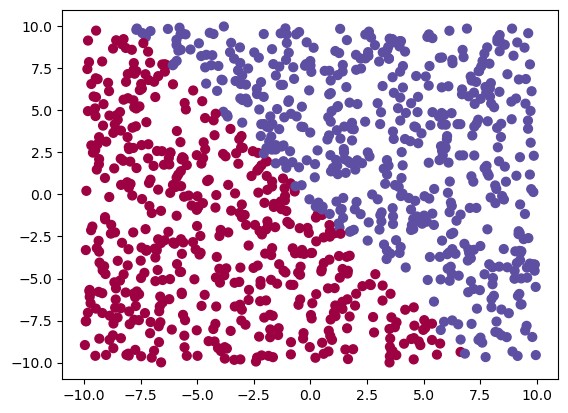

In [4]:
def linear_seperable_dataset(N=100):
    
    """
    Arguments:
    N -- The number of points to be plot by the dataset, and an equal number of points are saved for testing

    Returns
    X -- A list of poionts in the dataset
    y -- A list designating each point as either red or blue, chosen by a linear dividing curve
    """
    
    # We then generate a set of data to train upon
    N = N
    X = np.random.random((2*N,2))*20-10
    y = np.zeros(2*N)
    Y = np.zeros(2*N)

    # We randomise some constants to form the boundary 
    a = np.random.random()*2-1 # a ∈ [-1,1]
    b = np.random.random()*2-1 # b ∈ [-1,1]
    c = np.random.random()*2-1 # c ∈ [-1,1]

    for i in range(len(X[:,0])):
        if a*X[i,0]+b*X[i,1]>c: # Boundary: ax + by > c, which determines the colour of the points. The learning alogorithm doesn't know this.
            y[i] = 1
    return X,y

# Example use of the function
N = 1000
X,y = linear_seperable_dataset(N)
plt.scatter(X[N:,0],X[N:,1],c=y[N:],s=40,cmap=plt.cm.Spectral)
plt.show()



Function to create a polynomial seperable dataset

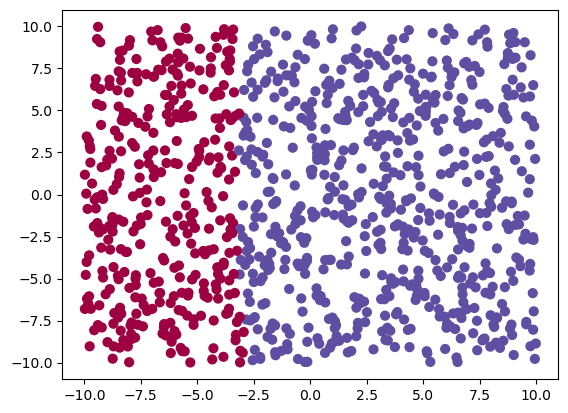

In [5]:
def poly_seperable_dataset(N=100):    
    
    """
    Arguments:
    N -- The number of points to be plot by the dataset, and an equal number of points are saved for testing

    Returns
    X -- A list of poionts in the dataset
    y -- A list designating each point as either red or blue, chosen by a non-linear curve that is almost polynomial
    """
    
    # We then generate a set of data to train upon
    N = N
    X = np.random.random((2*N,2))*20-10
    y = np.zeros(2*N)
    Y = np.zeros(2*N)
    
    # We randomise some constants to form the boundary
    a = np.random.random()*2 # a ∈ [0,2]
    b = np.random.random()*2 # b ∈ [0,2]
    c = np.random.random()*2-1 # c ∈ [-1,1]
    d = np.random.random()*3+1 # d ∈ [1,4]

    for i in range(len(X[:,0])):
        if a*X[i,0]+b*X[i,1]>c or a*X[i,0]**2+b*X[i,1]**2<d**2: # Boundary: ax + by > c or ax^2 + by^2 < d^2, determining the class of the point. The learning alogorithm doesn't know this.
            y[i] = 1
    return X,y

# Example use of the function
N = 1000
X,y = poly_seperable_dataset(N)
plt.scatter(X[N:,0],X[N:,1],c=y[N:],s=40,cmap=plt.cm.Spectral)
plt.show()



Function to create a Non-Linearly seperable dataset

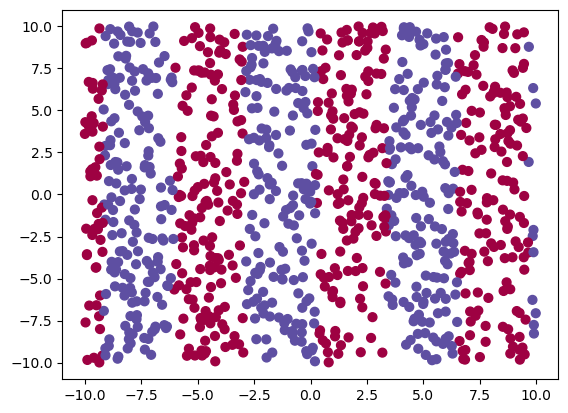

In [6]:
def sin_seperable_dataset(N=100):    
    
    """
    Arguments:
    N -- The number of points to be plot by the dataset, and an equal number of points are saved for testing

    Returns
    X -- A list of poionts in the dataset
    y -- A list designating each point as either red or blue, chosen by the sign of the equation a*sin(x - b)
    """
    
    # We then generate a set of data to train upon
    N = N
    X = np.random.random((2*N,2))*20-10
    y = np.zeros(2*N)
    Y = np.zeros(2*N)
    
    # We randomise some constants to form the boundary
    a = np.random.random()*2-1 # a ∈ [-1,1]
    b = np.random.random()*2*np.pi # b ∈ [0,2pi]

    for i in range(len(X[:,0])):
        if a*np.sin(X[i,0]-b)>0: # Points divided by a*sin(x - b) = 0
            y[i] = 1
    return X,y

# Example use of the function
N = 1000
X,y = sin_seperable_dataset(N)
plt.scatter(X[N:,0],X[N:,1],c=y[N:],s=40,cmap=plt.cm.Spectral)
plt.show()

Function to create a round blob in the data set

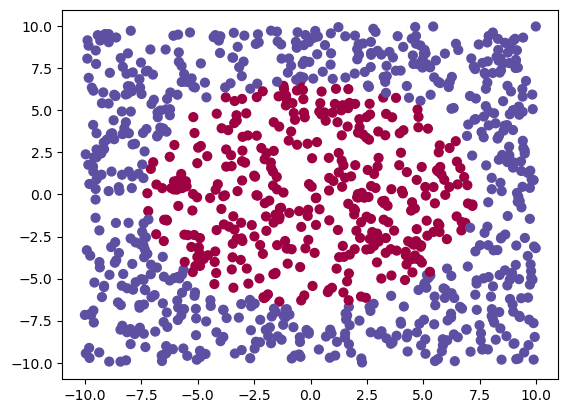

In [7]:
def blob_seperable_dataset(N=100): 
    
    """
    Arguments:
    N -- The number of points to be plot by the dataset, and an equal number of points are saved for testing

    Returns
    X -- A list of poionts in the dataset
    y -- A list designating each point as either red or blue, divided by an ellipse of random eccentricity
    """
    
    # We then generate a set of data to train upon
    N = N
    X = np.random.random((2*N,2))*20-10
    y = np.zeros(2*N)
    Y = np.zeros(2*N)
    
    # We randomise some constants to form the boundary
    a = np.random.random()*2+1 # a ∈ [1,3]
    b = np.random.random()*2+1 # b ∈ [1,3]
    c = np.random.random()*5+5 # c ∈ [5,10]

    for i in range(len(X[:,0])):
        if a*X[i,0]**2+b*X[i,1]**2>c**2: # Boundary: ax^2 + by^2 > c^2 
            y[i] = 1
    return X,y

# Example use of the function
N = 1000
X,y = blob_seperable_dataset(N)
plt.scatter(X[N:,0],X[N:,1],c=y[N:],s=40,cmap=plt.cm.Spectral)
plt.show()

Function to plot decision boundaries from the dataset

In [8]:
def plot_decision_boundaries_from_dataset(kernel="linear",degree=3,gamma="scale",N=100):
    
    """
    Arguments:
    Kernel -- A function type which can alter the dimension of the data to simplify the problem by making the dataset linearly seperable in this new case (Default: Linear)
    Degree -- (Polynomial kernel only) An intiger designating the degree of the polynomial chosen to project the data before seperation (Default: 3)
    Gamma -- A constant fitting factor chosen to determine the level of fitting the kernel attempts to approximate the dataset (Default: scale -- 1/(number of data points))
    N -- Number of datapoints to approximate upon

    Returns
    An illustration of the dataset with the decision boundary and supporting hyperplanes.
    An approximate accuracy score of the decision boundary
    """
    
    _, ax = plt.subplots()

    clf = svm.SVC(kernel=kernel,gamma=gamma,degree=degree).fit(X[N:,:], y[N:]) # Here we fit the model to the data using the SVM function in sklearn

    # The following code produces the diagram
    common_params = {"estimator": clf, "X": X[N:,:], "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        cmap=plt.cm.Spectral,
        alpha=0.3,
        grid_resolution = 1000
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        facecolors="none",
        edgecolors="k",
    )
    ax.scatter(X[N:,0],X[N:,1],c=y[N:],s=40,cmap=plt.cm.Spectral) # Displaying the training dataset
    _ = plt.show()
    
    if N!=0:
        prediction = clf.predict(X[:N,:]) # We here predict the output of the datapoints saved based upon the decision boundary
        actual = y[:N]
        print(f"Of the reserved datapoints, {np.sum(prediction==actual)}/{len(actual)} were correctly predicted, creating an accuracy of {100*np.sum(prediction==actual)/len(actual)}%")

##### Examples of using the above functions to produce the results of the previous parts

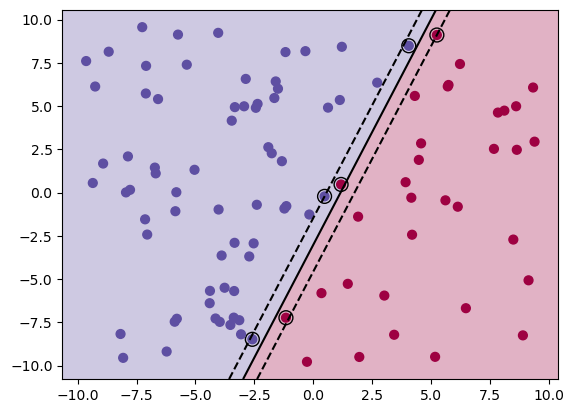

Of the reserved datapoints, 100/100 were correctly predicted, creating an accuracy of 100.0%


In [9]:
N = 100
X,y = linear_seperable_dataset(N)
plot_decision_boundaries_from_dataset(N=N)

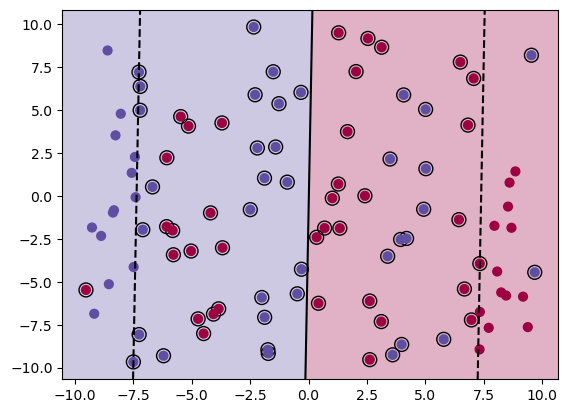

Of the reserved datapoints, 59/100 were correctly predicted, creating an accuracy of 59.0%


In [10]:
N = 100
X,y = sin_seperable_dataset(N)
plot_decision_boundaries_from_dataset(N=N)

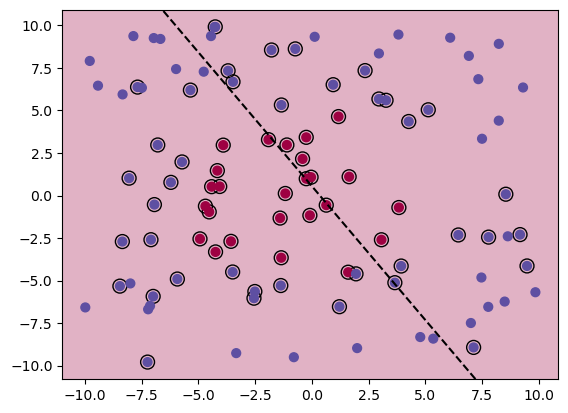

Of the reserved datapoints, 76/100 were correctly predicted, creating an accuracy of 76.0%


In [11]:
N = 100
X,y = blob_seperable_dataset(N)
plot_decision_boundaries_from_dataset(N=N)

### Different Kernels

So far, we've secretly been using the linear kernel, which produces the results above with linearly seperable points, however we now introduce the different kernels for non linear cases. Firsty we introduce the polynomial kernel

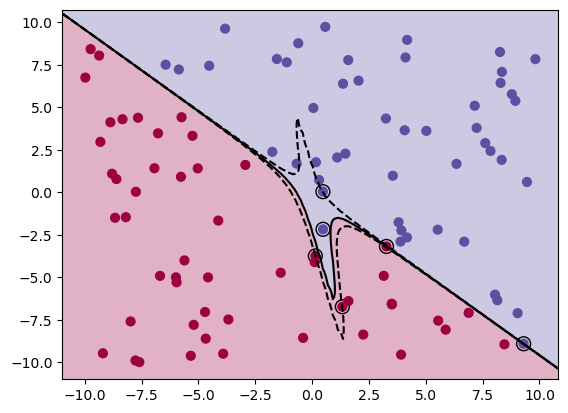

Of the reserved datapoints, 89/100 were correctly predicted, creating an accuracy of 89.0%


In [12]:
# The polynomial kernel
N = 100
X,y = poly_seperable_dataset(N)
plot_decision_boundaries_from_dataset(kernel="poly",degree=3,gamma=2,N=N)

However, there are datasets that the polynomial kernel cannot deal with, such as the following:

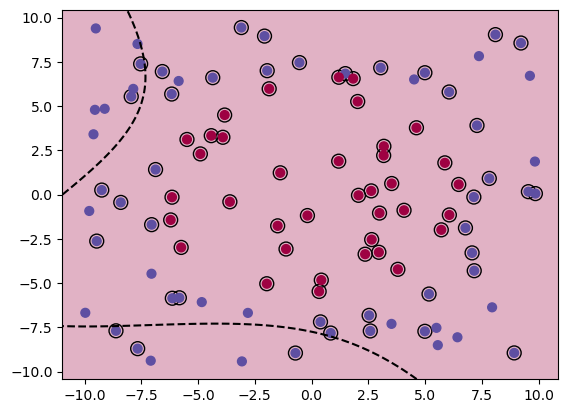

Of the reserved datapoints, 61/100 were correctly predicted, creating an accuracy of 61.0%


In [13]:
N = 100
X,y = blob_seperable_dataset(N)
plot_decision_boundaries_from_dataset(kernel="poly",degree=3,gamma=2,N=N)

Thus we introduce the most powerful kernel of SVM, the rbf kernel, which can be seen at work below:

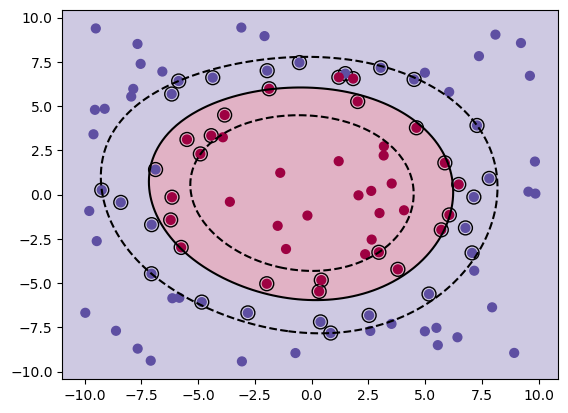

Of the reserved datapoints, 94/100 were correctly predicted, creating an accuracy of 94.0%


In [14]:
plot_decision_boundaries_from_dataset(kernel="rbf",gamma=0.02,N=N)

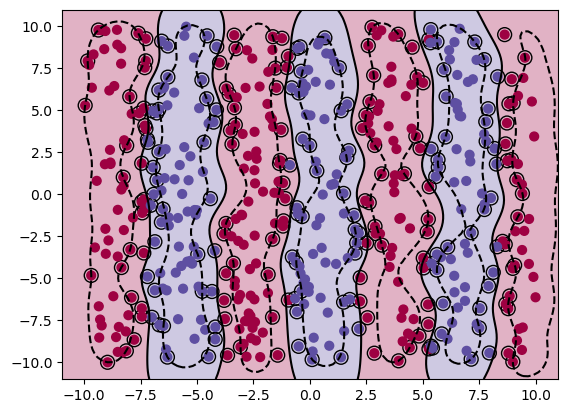

Of the reserved datapoints, 477/500 were correctly predicted, creating an accuracy of 95.4%


In [15]:
N = 500
X,y = sin_seperable_dataset(N)
plot_decision_boundaries_from_dataset(kernel="rbf",gamma=0.25,N=N)

### Additional content

Here we see that an SVM can beused to seperate 3 groups of points intead of just 2

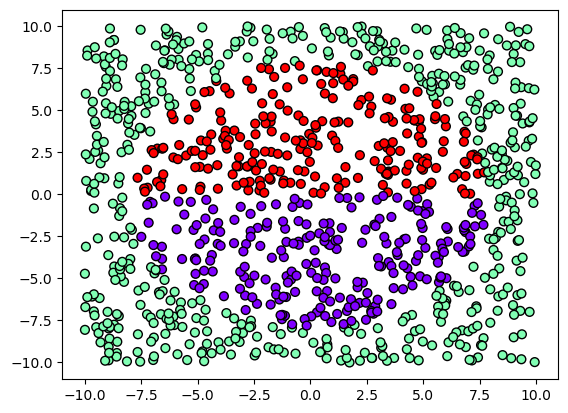

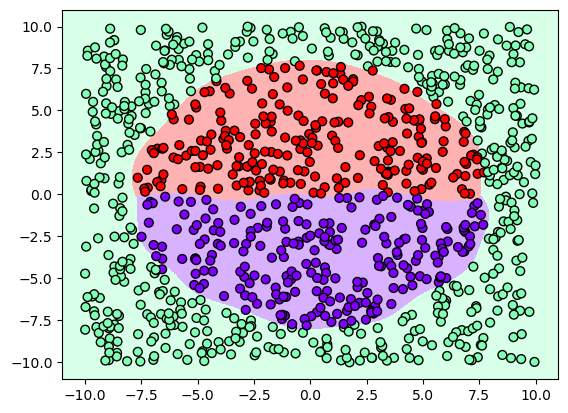

In [16]:
def tricolour_blob_seperable_dataset(N=100):
    
    """
    Arguments:
    N -- The number of points to be plot by the dataset

    Returns
    X -- A list of poionts in the dataset
    y -- A list designating each point as either red, purple, or green
    """
    
    # We then generate a set of data to train upon
    N = N
    X = np.random.random((N,2))*20-10
    y = np.zeros(N)
    Y = np.zeros(N)
    
    # We randomise some constants to form the boundary 
    a = np.random.random()*2+1 # a ∈ [1,3]
    b = np.random.random()*2+1 # b ∈ [1,3]
    c = np.random.random()*5+5 # c ∈ [5,10]

    for i in range(len(X[:,0])):
        if a*X[i,0]**2+b*X[i,1]**2>c**2: # Boundary: ax^2 + by^2 > c^2
            y[i] = 1
        elif X[i,1]>0: # Boundary: y > 0
                y[i] = 2
    return X,y

# We then test this function, creating a dataset
X,y = tricolour_blob_seperable_dataset(1000)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.rainbow, edgecolors="k")
plt.show()

_, ax = plt.subplots()

clf = svm.SVC(kernel="rbf",gamma=0.25,degree=3).fit(X, y) # Here we fit the model to the data using the SVM function in sklearn

# Here we produce the second diagram
common_params = {"estimator": clf, "X": X, "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="pcolormesh",
    cmap=plt.cm.rainbow,
    alpha=0.3,
    grid_resolution = 1000
)
ax.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.rainbow, edgecolors="k")
_ = plt.show()

Here we apply an SVM to the flower dataset used in section A3 and A4:

Linear Kernel:


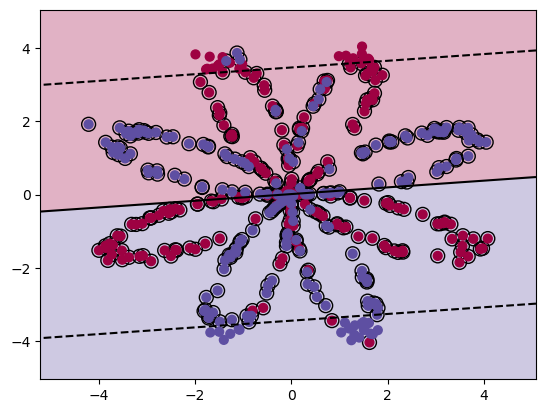

Polynomial Kernel (degree 3):


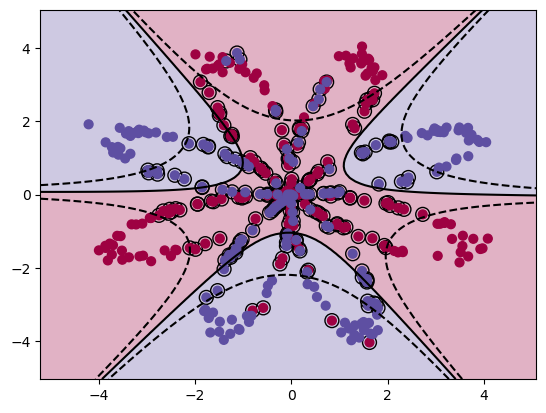

Polynomial Kernel (degree 5):


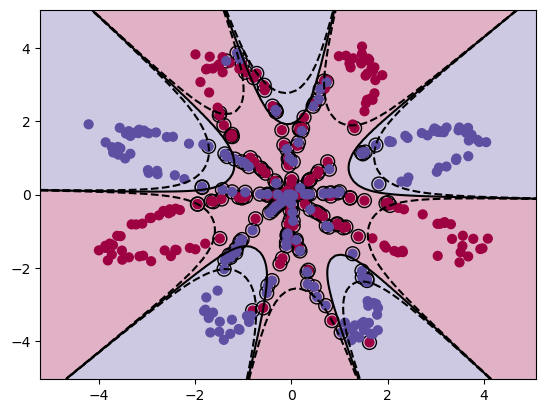

rbf Kernel:


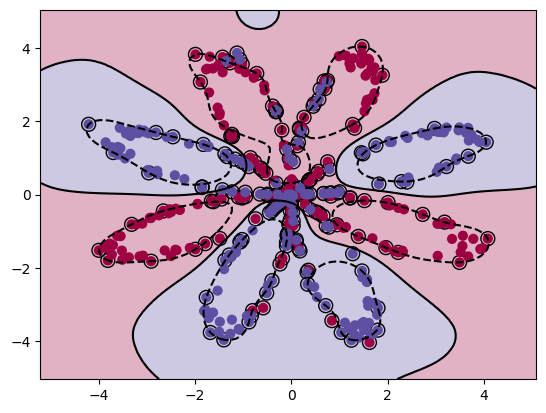

In [17]:
def load_flower_dataset():
    np.random.seed(1)

    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality

    X = np.zeros((m,D)) # data matrix where each row is a single example
    y = np.zeros(m) # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j

    return X, y

# Here we use the SVM kernels to approximate the flower dataset created above
N = 0
X, y = load_flower_dataset()
print("Linear Kernel:")
plot_decision_boundaries_from_dataset(kernel="linear",gamma=1,N=N)
print("Polynomial Kernel (degree 3):")
plot_decision_boundaries_from_dataset(kernel="poly",gamma=1,degree=3,N=N)
print("Polynomial Kernel (degree 5):")
plot_decision_boundaries_from_dataset(kernel="poly",gamma=1,degree=5,N=N)
print("rbf Kernel:")
plot_decision_boundaries_from_dataset(kernel="rbf",gamma=1,N=N)

This model of machine learning is very prone to overfitting and underfitting however, which is extremely apparent when we take the rbf kernel and an extreme value of gamma

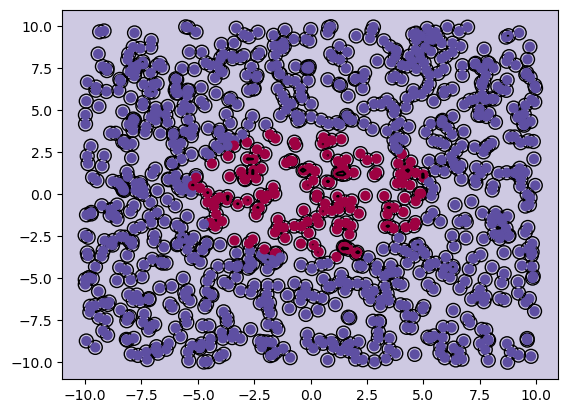

Of the reserved datapoints, 840/1000 were correctly predicted, creating an accuracy of 84.0%


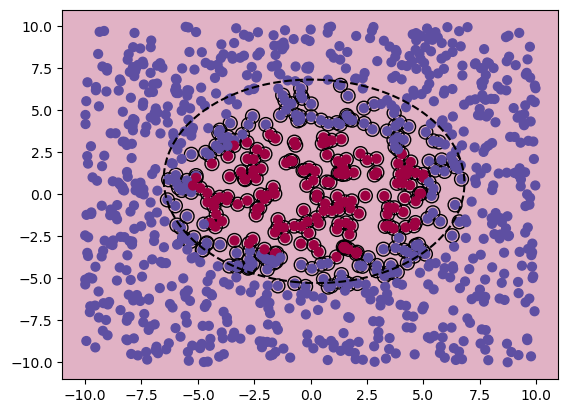

Of the reserved datapoints, 838/1000 were correctly predicted, creating an accuracy of 83.8%


In [18]:
N = 1000
X,y = blob_seperable_dataset(N)
plot_decision_boundaries_from_dataset(kernel="rbf",gamma=100,N=N)
plot_decision_boundaries_from_dataset(kernel="rbf",gamma=0.0001,N=N)

References:

[1] [Scikit learn SVM documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[2] [Scikit learn article #1](https://scikit-learn.org/stable/modules/svm.html)

[3] [Scikit Learn article #2](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html)